In [16]:
import pandas as pd

In [18]:
X_train = pd.read_csv("data/X_train.csv")
X_train["Species"].value_counts()

Species
Ryegrass_Clover                                                98
Ryegrass                                                       62
Phalaris_Clover                                                42
Clover                                                         41
Fescue                                                         28
Lucerne                                                        22
Phalaris_BarleyGrass_SilverGrass_SpearGrass_Clover_Capeweed    11
Fescue_CrumbWeed                                               10
WhiteClover                                                    10
Phalaris_Ryegrass_Clover                                        8
Phalaris                                                        8
Phalaris_Clover_Ryegrass_Barleygrass_Bromegrass                 7
SubcloverLosa                                                   5
SubcloverDalkeith                                               3
Mixed                                                           2
Na

## Correlation analysis

#### Height and NVDI

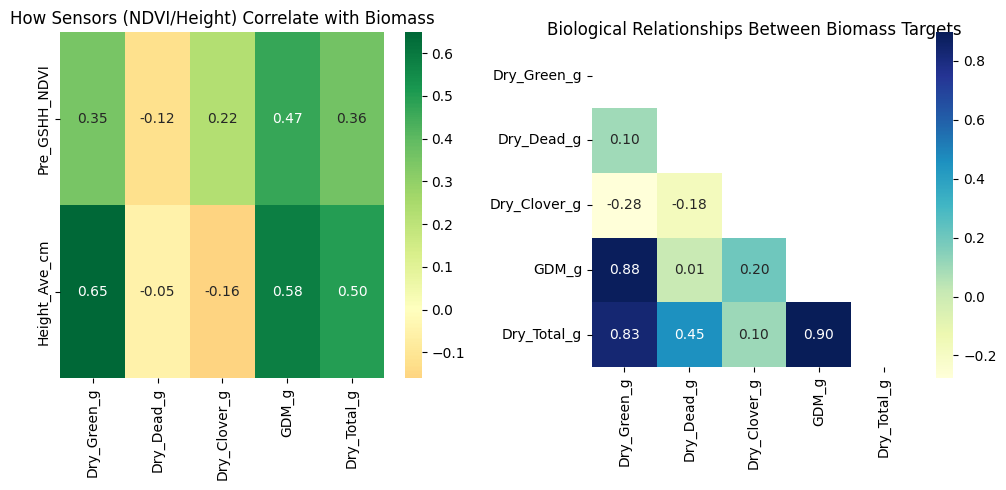

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from typing import Final

# 1. Setup Constants
FEATURES: Final = ["Pre_GSHH_NDVI", "Height_Ave_cm"]
TARGETS: Final = ["Dry_Green_g", "Dry_Dead_g", "Dry_Clover_g", "GDM_g", "Dry_Total_g"]

# 2. Load and Merge
X, y = pd.read_csv("./data/X_train.csv"), pd.read_csv("./data/y_train.csv")
combined_df = pd.merge(X, y, on="image_id")

# 3. Calculate Matrices
# Full correlation of all variables of interest
full_corr = combined_df[FEATURES + TARGETS].corr()

# Slice A: How features affect targets
feature_target_corr = full_corr.loc[FEATURES, TARGETS]

# Slice B: How targets affect each other
target_inter_corr = full_corr.loc[TARGETS, TARGETS]

# 4. Plotting using a 2-row layout
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Top Plot: Features vs Targets
sns.heatmap(feature_target_corr, annot=True, cmap="RdYlGn", center=0, fmt=".2f", ax=ax1)
ax1.set_title("How Sensors (NDVI/Height) Correlate with Biomass")

# Bottom Plot: Inter-target relationships
# We use a mask to hide the upper triangle for better clarity on the 5x5 matrix
mask = np.triu(np.ones_like(target_inter_corr, dtype=bool))

sns.heatmap(
    target_inter_corr,
    mask=mask,
    annot=True,
    cmap="YlGnBu",  # Different color to distinguish the two charts
    fmt=".2f",
    ax=ax2,
    square=True,
)
ax2.set_title("Biological Relationships Between Biomass Targets")

plt.tight_layout()
plt.savefig("./results/combined_correlations.png")

#### State Analysis

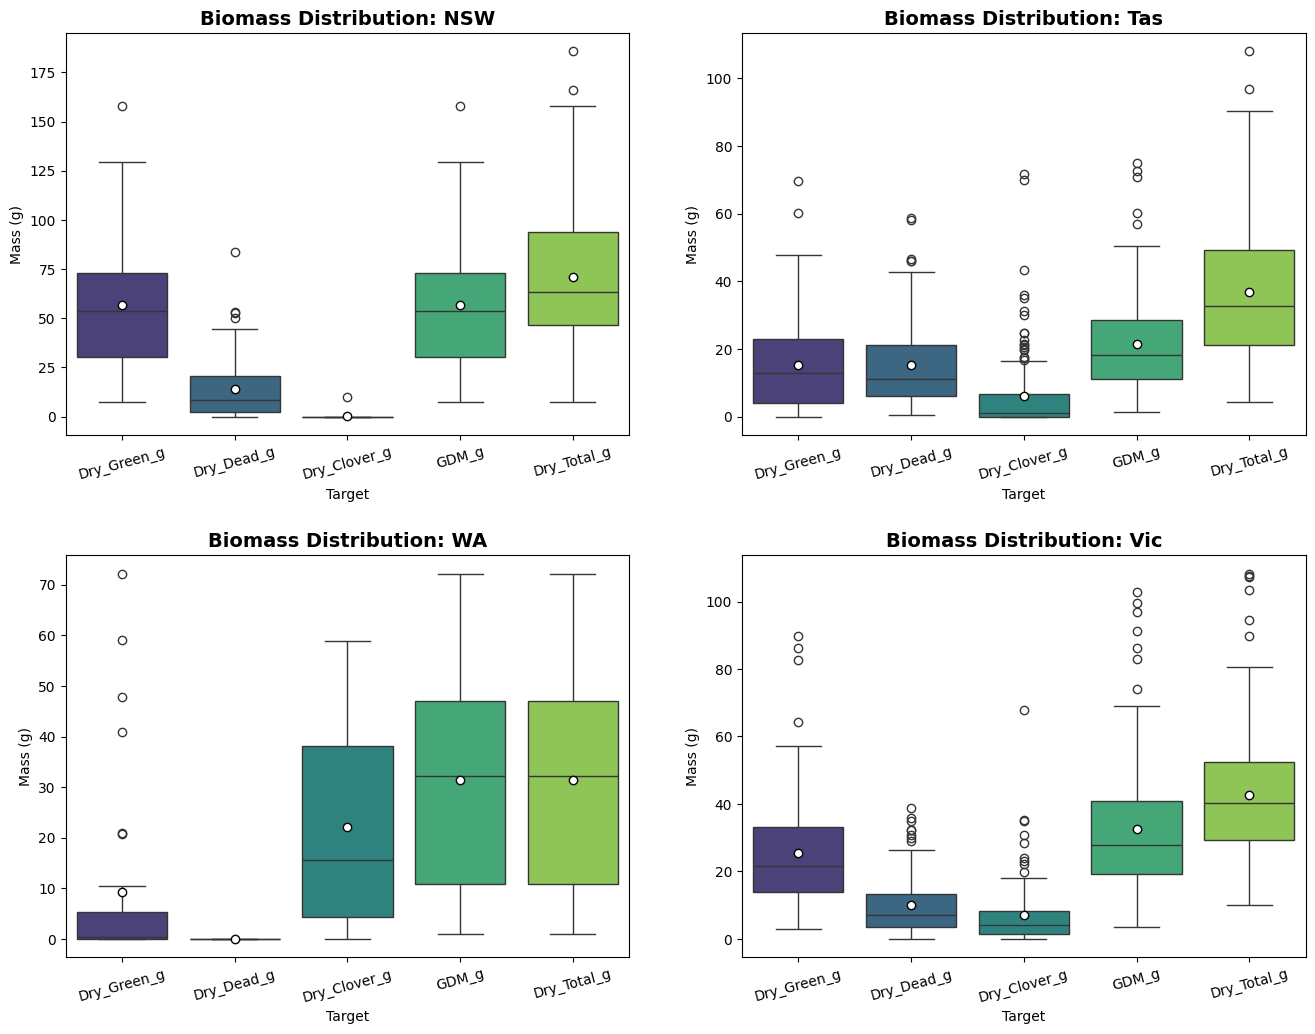

In [31]:
STATES: Final[list[str]] = ["NSW", "Tas", "WA", "Vic"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
# Flatten the 2D array of axes into a 1D list for easy iteration
axes_flat = axes.flatten()

for i, state in enumerate(STATES):
    ax = axes_flat[i]
    state_col: str = f"State_{state}"

    state_df = combined_df[combined_df[state_col] == True]
    melted = state_df[TARGETS].melt(var_name="Target", value_name="Mass (g)")

    # 5. Create the boxplot
    sns.boxplot(
        data=melted,
        x="Target",
        y="Mass (g)",
        hue="Target",
        palette="viridis",
        ax=ax,
        showmeans=True,  # Adding mean marker for extra insight
        meanprops={
            "marker": "o",
            "markerfacecolor": "white",
            "markeredgecolor": "black",
        },
    )

    ax.set_title(f"Biomass Distribution: {state}", fontsize=14, fontweight="bold")
    ax.tick_params(axis="x", rotation=15)

    # Remove redundant legend (since target names are on X-axis)
    if ax.get_legend():
        ax.get_legend().remove()

    plt.subplots_adjust(hspace=0.3, wspace=0.2)
    plt.savefig("state_biomass_analysis.png")
